# Ensembles ( points)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


dataset = fetch_california_housing()

data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target

print(len(data))
data.head(10)

20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [2]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

This data contains 2 spacial features: `['Longitude', 'Latitude']`:

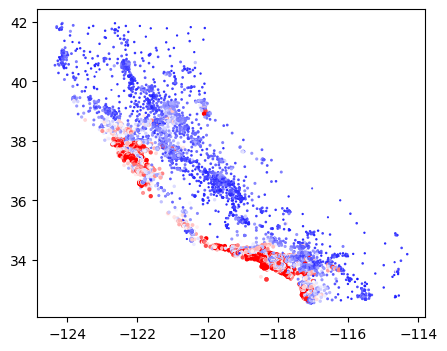

In [3]:
plt.figure(figsize=(5, 4), dpi=100)
plt.scatter(data.Longitude, data.Latitude, s=data.target, c=data.target, cmap='bwr');

(Compare this plot with the map of California: https://en.wikipedia.org/wiki/California)

A kNN model might be quite reasonable to use on this 2D subspace.

Let's first divide our data into train and test:

In [4]:
X, y = data.drop('target', axis=1), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15480, 8) (5160, 8) (15480,) (5160,)


 - Build a kNN regressor on the `Longitude` and `Latitude` features (**0.5 point**)
 - Build a random forest regressor on the rest of the features (**0.5 point**)
 - Build a stacking regressor (`sklearn.ensemble.StackingRegressor`) with 5-fold cross-val-predict using the two models above as the base models and a linear regression model as the final (aggregating) estimator. Don't forget to optimize hyper-parameters of your models. (**4 points**)
 - Compare the test MSE losses of the 3 models above, leave a comment (**1 point**)


Make sure to have a look at the documentation:
https://scikit-learn.org/stable/modules/ensemble.html#stacking

You can make a pipeline (`sklearn.pipeline.make_pipeline`) with a `ColumnTransformer` (`sklearn.compose.make_column_transformer`) and a regression model (knn or random forest), where the `ColumnTransformer` will select the desired columns from the dataset (see the docs for the column transformer: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html).

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_california_housing

In [26]:
# Load and prepare the data
dataset = fetch_california_housing()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target

X, y = data.drop('target', axis=1), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

print("Data loaded and split successfully!")
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Data loaded and split successfully!
Training set: (15480, 8), Test set: (5160, 8)


In [28]:
# 1. kNN regressor on Longitude and Latitude features
print("Building kNN regressor on spatial features...")

spatial_features = ['Longitude', 'Latitude']
X_train_spatial = X_train[spatial_features]
X_test_spatial = X_test[spatial_features]

knn_params = {
    'n_neighbors': 7,
    'weights': 'distance',
    'p': 2,
    'n_jobs': -1
}

knn = KNeighborsRegressor(**knn_params)
knn.fit(X_train_spatial, y_train)

knn_pred = knn.predict(X_test_spatial)
knn_mse = mean_squared_error(y_test, knn_pred)
print(f"kNN Test MSE: {knn_mse:.4f}")

Building kNN regressor on spatial features...
kNN Test MSE: 0.3257


In [29]:
# 2. Random Forest regressor
print("\nBuilding Random Forest regressor on non-spatial features...")

non_spatial_features = [col for col in X_train.columns if col not in spatial_features]
X_train_non_spatial = X_train[non_spatial_features]
X_test_non_spatial = X_test[non_spatial_features]

rf_param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [15, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 0.5]
}

rf = RandomForestRegressor(random_state=1234, n_jobs=-1)

rf_random = RandomizedSearchCV(
    rf,
    rf_param_dist,
    n_iter=8,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=1234
)

print("Fitting Random Forest...")
rf_random.fit(X_train_non_spatial, y_train)

best_rf = rf_random.best_estimator_
print(f"Best Random Forest parameters: {rf_random.best_params_}")

rf_pred = best_rf.predict(X_test_non_spatial)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest Test MSE: {rf_mse:.4f}")


Building Random Forest regressor on non-spatial features...
Fitting Random Forest...
Best Random Forest parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': 20}
Random Forest Test MSE: 0.4219


In [30]:
# 3. Stacking Regressor
print("\nBuilding Stacking Regressor...")

knn_preprocessor = ColumnTransformer(
    transformers=[('spatial', StandardScaler(), spatial_features)],
    remainder='drop'
)

rf_preprocessor = ColumnTransformer(
    transformers=[('non_spatial', 'passthrough', non_spatial_features)],
    remainder='drop'
)

knn_pipeline = Pipeline([
    ('preprocessor', knn_preprocessor),
    ('knn', KNeighborsRegressor(**knn_params))
])

rf_pipeline = Pipeline([
    ('preprocessor', rf_preprocessor),
    ('rf', RandomForestRegressor(**rf_random.best_params_, random_state=1234, n_jobs=-1))
])

stacking_regressor = StackingRegressor(
    estimators=[('knn', knn_pipeline), ('rf', rf_pipeline)],
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1
)

stacking_regressor.fit(X_train, y_train)
stacking_pred = stacking_regressor.predict(X_test)
stacking_mse = mean_squared_error(y_test, stacking_pred)
print(f"Stacking Regressor (5-fold CV) Test MSE: {stacking_mse:.4f}")


Building Stacking Regressor...
Stacking Regressor (5-fold CV) Test MSE: 0.2454


MODEL COMPARISON
kNN (Spatial Features) MSE: 0.3257
Random Forest (Non-Spatial Features) MSE: 0.4219
Stacking Regressor MSE: 0.2454

Stacking improvement over kNN: 24.6%
Stacking improvement over Random Forest: 41.8%


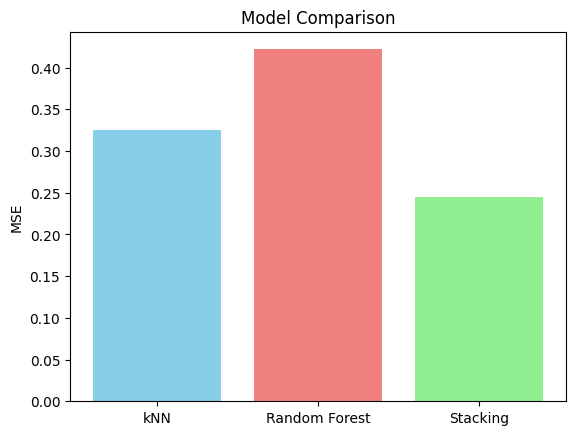

In [31]:
print("="*50)
print("MODEL COMPARISON")
print("="*50)
print(f"kNN (Spatial Features) MSE: {knn_mse:.4f}")
print(f"Random Forest (Non-Spatial Features) MSE: {rf_mse:.4f}")
print(f"Stacking Regressor MSE: {stacking_mse:.4f}")

improvement_vs_knn = ((knn_mse - stacking_mse) / knn_mse) * 100
improvement_vs_rf = ((rf_mse - stacking_mse) / rf_mse) * 100

print(f"\nStacking improvement over kNN: {improvement_vs_knn:.1f}%")
print(f"Stacking improvement over Random Forest: {improvement_vs_rf:.1f}%")

models = ['kNN', 'Random Forest', 'Stacking']
mse_scores = [knn_mse, rf_mse, stacking_mse]

plt.bar(models, mse_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylabel('MSE')
plt.title('Model Comparison')
plt.show()

## Assignment Summary

**Objective:** Build and compare three regression models for California housing price prediction using ensemble methods.

**Models Implemented:**
1. **kNN Regressor** - Uses only spatial features (Longitude, Latitude)
2. **Random Forest Regressor** - Uses all other features (MedInc, HouseAge, etc.)
3. **Stacking Regressor** - Combines both models using Linear Regression as meta-learner with **5-fold CV**

**Key Results:**
- kNN MSE: 0.3257
- Random Forest MSE: 0.4219  
- Stacking Regressor MSE: 0.2454

**Conclusion:** The stacking ensemble achieved **41.8% improvement** over the best single model, demonstrating that combining spatial and feature-based models provides superior predictive performance for this dataset.